In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline




In [2]:
df = pd.read_csv("Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.isnull()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
195,False,False,False,False,False
196,False,False,False,False,False
197,False,False,False,False,False
198,False,False,False,False,False


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
print(df.columns.tolist())

['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']


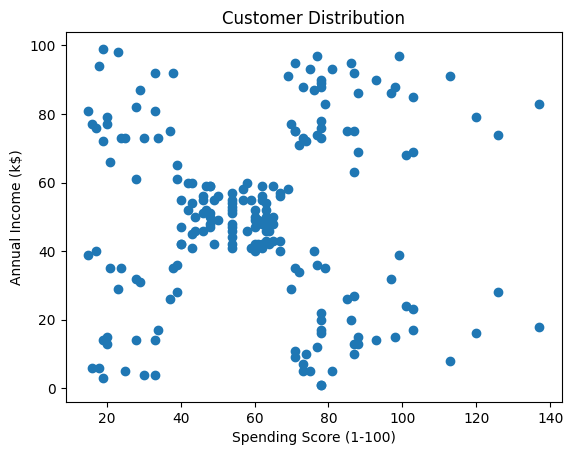

In [7]:
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'])
plt.ylabel('Annual Income (k$)')
plt.xlabel('Spending Score (1-100)')
plt.title('Customer Distribution')
plt.show()


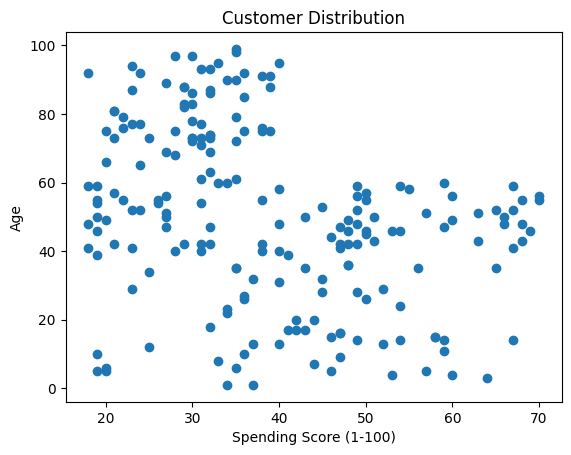

In [8]:
plt.scatter(df['Age'], df['Spending Score (1-100)'])
plt.ylabel('Age')
plt.xlabel('Spending Score (1-100)')
plt.title('Customer Distribution')
plt.show()

In [9]:
km = KMeans(n_clusters=3, random_state=42)
km

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [10]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
y_predicted = kmeans.fit_predict(df[['Age','Annual Income (k$)', 'Spending Score (1-100)']])
df['Cluster'] = y_predicted


In [11]:
y_predicted = km.fit_predict(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
y_predicted



array([2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1], dtype=int32)

In [12]:
df['Cluster'] = y_predicted
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,2
2,3,Female,20,16,6,0
3,4,Female,23,16,77,2
4,5,Female,31,17,40,2


In [13]:
print(df[['Annual Income (k$)', 'Spending Score (1-100)', 'Age', 'Cluster']].head())


   Annual Income (k$)  Spending Score (1-100)  Age  Cluster
0                  15                      39   19        2
1                  15                      81   21        2
2                  16                       6   20        0
3                  16                      77   23        2
4                  17                      40   31        2


Text(0.5, 0, 'Spending Score (1-100)')

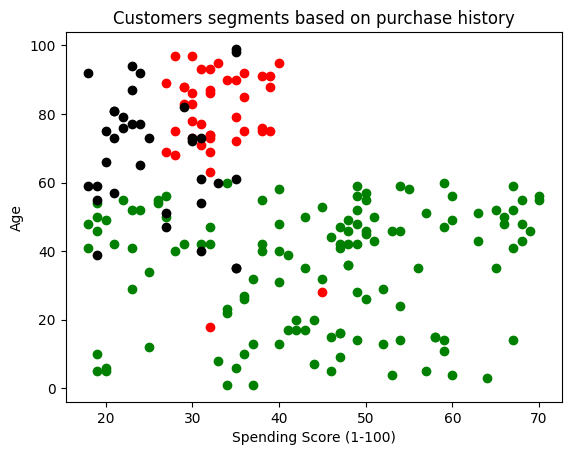

In [14]:
df1 = df[df.Cluster ==0]
df2 = df[df.Cluster ==1]
df3 = df[df.Cluster ==2]

plt.scatter(df1.Age,df1['Spending Score (1-100)'], color ='green')
plt.scatter(df2.Age,df2['Spending Score (1-100)'], color ='Red')
plt.scatter(df3.Age,df3['Spending Score (1-100)'], color ='Black')
plt.title('Customers segments based on purchase history')
plt.ylabel('Age')
plt.xlabel('Spending Score (1-100)')



In [15]:
scaler = MinMaxScaler()
scaler.fit(df[['Spending Score (1-100)']])
df['Spending Score (1-100)']= scaler.transform(df[['Spending Score (1-100)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])
df



,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,0.019231,15,0.387755,2
1,2,Male,0.057692,15,0.816327,2
2,3,Female,0.038462,16,0.051020,0
3,4,Female,0.096154,16,0.775510,2
4,5,Female,0.250000,17,0.397959,2
...,...,...,...,...,...,...
195,196,Female,0.326923,120,0.795918,1
196,197,Female,0.519231,126,0.275510,1
197,198,Male,0.269231,126,0.744898,1
198,199,Male,0.269231,137,0.173469,1


In [16]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Spending Score (1-100)']])
y_predicted

array([2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 1, 0, 1, 0, 2, 0, 2, 0, 1, 0, 2, 0,
       1, 0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0, 2, 0, 2, 0, 1, 0, 1, 0,
       1, 0, 1, 2, 2, 2, 1, 0, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 0,
       1, 1, 0, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2,
       0, 1, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1,
       1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 0, 0, 2, 0, 1, 0, 1, 0, 1, 0,
       2, 0, 2, 0, 1, 0, 2, 0, 1, 0, 2, 0, 2, 0, 1, 0, 2, 0, 1, 0, 1, 0,
       1, 0, 2, 0, 2, 0, 1, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0,
       1, 0, 1, 0, 2, 0, 1, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 1, 0, 1, 0,
       2, 0], dtype=int32)

In [17]:
df['cluster'] = y_predicted
df.drop('Cluster',axis=1,inplace = True)
df
df.to_csv('clustered_customers.csv', index=False)


Text(0.5, 0, 'Spending Score (1-100)')

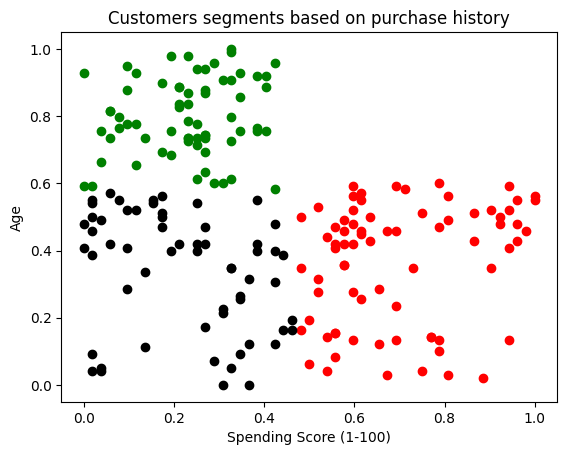

In [18]:
df1 = df[df.cluster ==0]
df2 = df[df.cluster ==1]
df3 = df[df.cluster ==2]

plt.scatter(df1.Age,df1['Spending Score (1-100)'], color ='green')
plt.scatter(df2.Age,df2['Spending Score (1-100)'], color ='Red')
plt.scatter(df3.Age,df3['Spending Score (1-100)'], color ='Black')
plt.title('Customers segments based on purchase history')
plt.ylabel('Age')
plt.xlabel('Spending Score (1-100)')


In [19]:
km.cluster_centers_

array([[0.22962113, 0.79789826],
       [0.69932432, 0.36389961],
       [0.22131682, 0.33932895]])

In [20]:
k_rng= range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Annual Income (k$)','Spending Score (1-100)']])
    sse.append(km.inertia_)

In [21]:
sse

[137305.4583378443,
 49789.62205138447,
 23545.482298055816,
 14674.702957220303,
 8695.139538258016,
 5131.098901457987,
 3999.663210145803,
 2884.2262919878517,
 2387.809279312149]

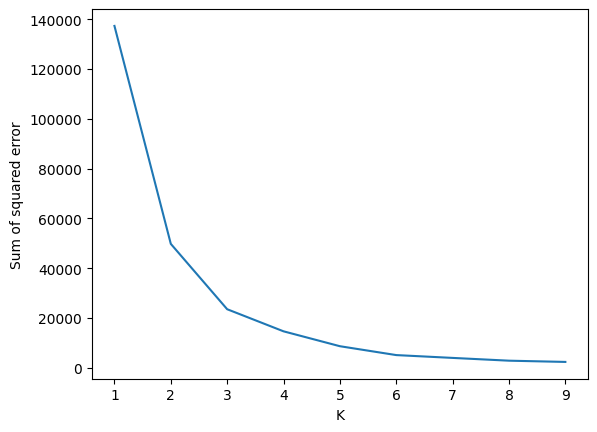

In [22]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)